# ANÁLISIS EXPLORATORIO DE DATOS (EDA)
## DATASET: **Víctimas**

## Índice de contenido

1. **Ingesta de datos**

2. **Inspección preliminar**

3. **Duplicados**

4. **Valores faltantes**

5. **Outliers**

6. **Gráficos (variables cuantitativas)**

7. **Gráficos (variables cualitativas)**



## 1. Ingesta de datos

### 1.1 Importamos librerías

In [93]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

<p>



</p>

### 1.2 Leemos los datasets

Importamos el dataset en formato .xlsx

In [94]:
df = pd.read_excel('data/victimas.xlsx')

<p>



</p>

## 2. Inspección preliminar del dataset

**MUESTRA**

Comenzamos con una rapida muestra de los primeros datos del dataset

In [95]:
df.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


<p>



</p>

**COLUMNAS Y FILAS**

Mediante el uso de **.shape**, vemos la cantidad de columnnas y de registros respectivamente

In [96]:
df.shape

(717, 10)

<p>



</p>

**NOMBRES DE COLUMNAS**

A continuación, bservamos los nombres de las columnas para identificar inconsistencias.

In [97]:
df.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [98]:
# Se coloca la primera en mayúscula
df.columns = [x.capitalize() for x in df.columns]
# Se reemplazan los guiones por espacios
df.columns = df.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df = df.rename(columns={'Id hecho': 'Id',
                        'Aaaa':'Año',
                        'Mm':'Mes',
                        'Dd':'Día',
                        'Victima':'Víctima'})

<p>



</p>

**TIPOS DE DATOS Y VALORES FALTANTES**

Mediante el uso de **.info()** observamos tipos de datos de cada columna y si poseen nulos.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   717 non-null    object        
 1   Fecha                717 non-null    datetime64[ns]
 2   Año                  717 non-null    int64         
 3   Mes                  717 non-null    int64         
 4   Día                  717 non-null    int64         
 5   Rol                  717 non-null    object        
 6   Víctima              717 non-null    object        
 7   Sexo                 717 non-null    object        
 8   Edad                 717 non-null    object        
 9   Fecha fallecimiento  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


<p>



</p>

Observamos los porcentajes de valores 'SD' en las columnas

In [100]:
columnas_interes = ['Víctima', 'Sexo', 'Rol', 'Fecha fallecimiento', 'Edad']

for columna in columnas_interes:
    porcentaje = (df[columna][df[columna] == 'SD'].count() / df.shape[0]) * 100
    print(f"Porcentaje de 'SD' en {columna} = {porcentaje:.2f}%")

Porcentaje de 'SD' en Víctima = 1.26%
Porcentaje de 'SD' en Sexo = 0.84%
Porcentaje de 'SD' en Rol = 1.53%
Porcentaje de 'SD' en Fecha fallecimiento = 9.48%
Porcentaje de 'SD' en Edad = 7.39%


<p>



</p>

Para la columna 'EDAD', imputraremos a los SD un valor numerico que identifique error o falta de dato. Usaremos np.nan

Hacemos esto para poder trabajar la columna EDAD como numero si es necesario hacer algun promedio o sacar valores estadisticos. 

In [101]:
df['Edad'] = df['Edad'].replace('SD', np.nan)

In [102]:
df['Edad'].unique()

array([19., 70., 30., 18., 29., 22., 16., 59., 65., 34., 41., 50., 38.,
       21., 52., 36., 20., 54., nan, 56., 24., 78., 79., 26., 57., 37.,
       58., 23., 60., 42., 53., 51., 40., 87., 76., 75., 35., 80., 43.,
       45., 67., 27., 55., 49., 81., 25., 33., 46., 83., 39., 28.,  7.,
       48.,  4., 82., 32., 17., 47., 61., 10., 95., 73., 84., 66., 85.,
        1., 15., 13., 77., 44., 31., 62., 74., 71., 11., 86., 69., 72.,
       12., 63., 92., 68., 91., 64.,  5., 88.])

<p>



</p>

## 3. Duplicados


A continuación se evidencia la existencia o inexistencia de registros duplicados en el dataset. 

Esto es de suma importancia, ya que un dataset con valores duplicados puede sesgar el resultado de los análisis posteriores. 

In [103]:
df.duplicated().sum()

0

## 4. Valores faltantes

En este apartado se buscan los valores faltantes de cada columna y se analiza que hacer con ellos. 

Para este dataset, los valores faltantes de la columna 'Edad' son los previamente reemplazados por np.nan, donde el valor original era faltante.

In [104]:
df.isnull().sum()

Id                      0
Fecha                   0
Año                     0
Mes                     0
Día                     0
Rol                     0
Víctima                 0
Sexo                    0
Edad                   53
Fecha fallecimiento     0
dtype: int64

<p>



</p>

## 5. Outliers

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   717 non-null    object        
 1   Fecha                717 non-null    datetime64[ns]
 2   Año                  717 non-null    int64         
 3   Mes                  717 non-null    int64         
 4   Día                  717 non-null    int64         
 5   Rol                  717 non-null    object        
 6   Víctima              717 non-null    object        
 7   Sexo                 717 non-null    object        
 8   Edad                 664 non-null    float64       
 9   Fecha fallecimiento  717 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 56.1+ KB


En esta sección identificaremos los **outliers** del dataset, es decir, aquellos valores que ***“escapan al rango en donde se concentran la mayoría de muestras"***

Previo a la identificación de estos valores, definiremos las columnas que queremos analizar. 

En este caso seran: EDAD, AAAA, MM y DD

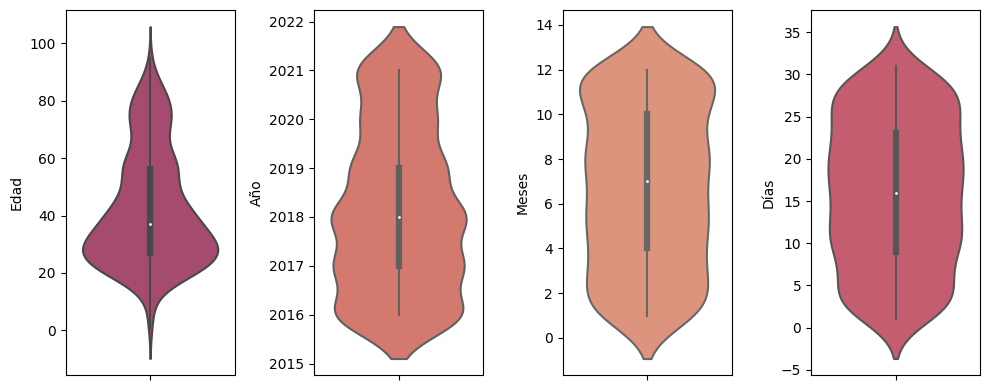

In [106]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos de violín
plt.subplot(1, 4, 1) 
sns.violinplot(data=df, y='Edad', color = "#b43c6c")
plt.ylabel('Edad')

plt.subplot(1, 4, 2) 
sns.violinplot(data=df, y='Año', color = "#e46c5c")
plt.ylabel('Año')

plt.subplot(1, 4, 3) 
sns.violinplot(data=df, y='Mes', color = "#ec8c6c")
plt.ylabel('Meses')

plt.subplot(1, 4, 4) 
sns.violinplot(data=df, y='Día', color = "#d44c64")
plt.ylabel('Días')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()


Cada uno de los gráficos que observamos arriba, nos muestran una distribución de las ocurrencias según la variable que estamos analizando. 

El gráfico de 'EDAD' nos muestra un outlier. Está haciendo referencia al valor de error 999 que imputamos en el paso anterior. Por lo tanto lo desestimamos y concluimos que no existen outliers en ninguna de las variables numericas. 

<p>



</p>

## 6. Gráficos (variables cuantitativas)

### 6.1 Correlación de variables

Para identificar la relación entre las variables, crearemos una matriz de correlación. 

In [107]:
# Establecemos cuales son las variables que queremos analizar
variables_numericas = ['Edad', 'Año', 'Mes', 'Día']

# Creamos la matriz de correlación
correlation_matrix = df[variables_numericas].corr()

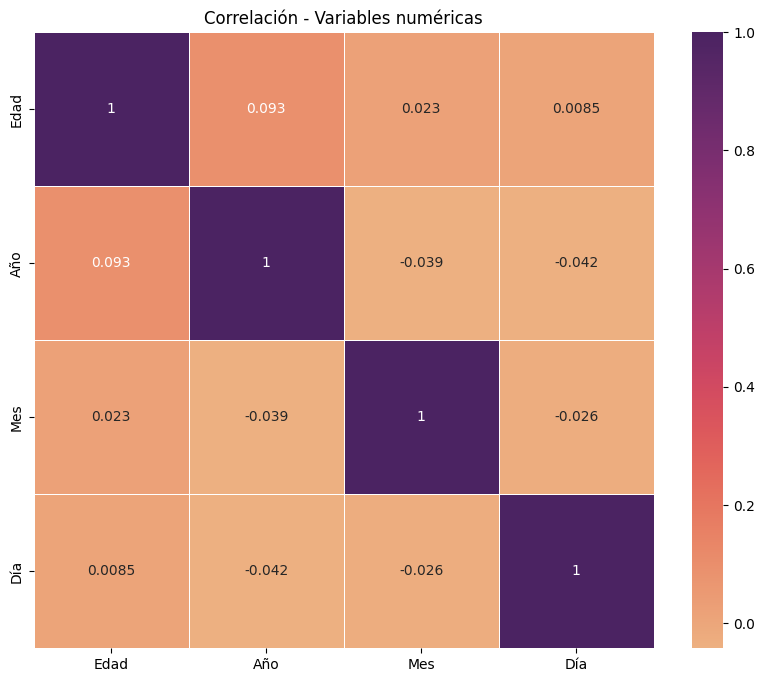

In [108]:
# Graficamos la matriz generada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', linewidths=0.5)
plt.title('Correlación - Variables numéricas')
plt.show()

El análisis revela que la mayoría de los coeficientes de correlación se encuentran cercanos a cero, indicando una correlación débil o nula entre las variables.

Esto tiene sentido ya que, el año, mes, día y hora en la que ocurre el siniestro no esta ligada a la edad de las victimas.


<p>



</p>

### 6.2 Distribución de variables

Mediante la utlización de los siguientes gráficos y estadísticas, buscamos entender en profundidad la información de cada variable.

<p>



</p>

**Edad**

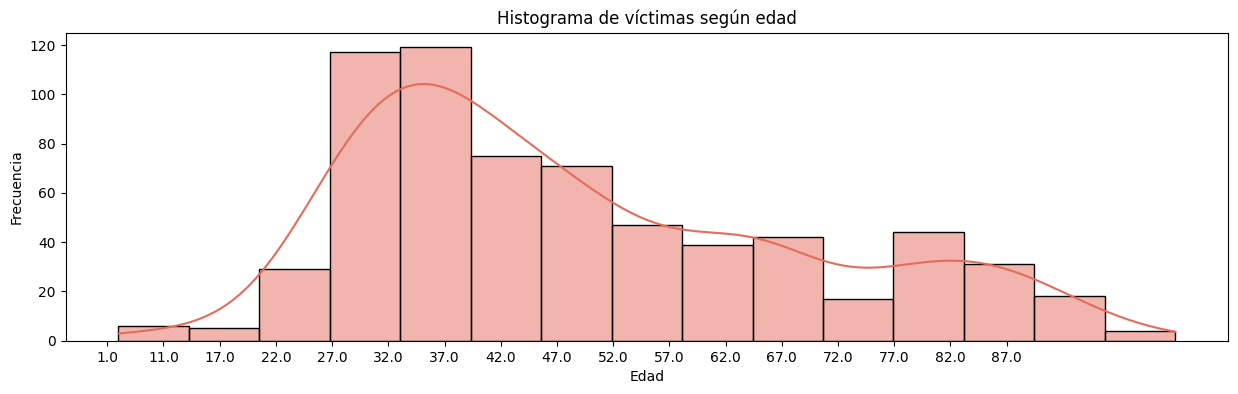

In [109]:
df_filtrado = df[df['Edad'].notna()].sort_values(by='Edad')

plt.figure(figsize=(15, 4))

sns.histplot(df_filtrado['Edad'], kde=True, color='#e46c5c')

# Personaliza las etiquetas en el eje x
xticks_labels = df_filtrado['Edad'].unique()[::5]
plt.xticks(range(0, len(xticks_labels) * 5, 5), xticks_labels)

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de víctimas según edad')

plt.show()



El histrograma nos deja ver que la edad mas frecuente de victimas se encuentra en el rango de 20-40 años.

Antes de los 20 años, la cantidad de victimas es muy baja y puede estar relacionada con la edad mínima para la obtención de la licencia de conducir.

Luego del rango anteriormente menionado se observa una tendencia a la baja en las edades superiores a los 40 años. 

<p>



</p>

**Año**

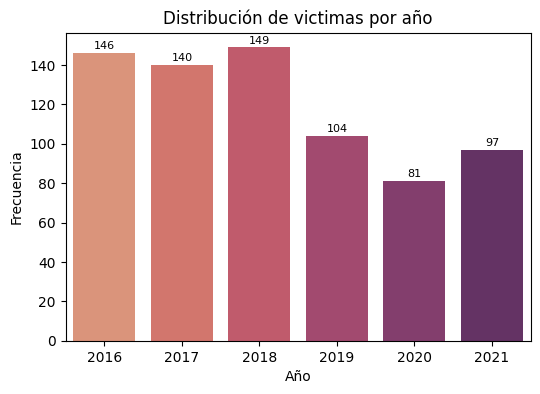

In [110]:
plt.figure(figsize=(6, 4)) 

graf = sns.countplot(df, x='Año', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de victimas por año')

plt.show()

Al igual que ocurre con el dataset de hechos, podemos ver que los años previos a la pandemia mantenian un nivel constante de victimas.

Luego de la aparición del CO-VID y el lockdown, disminuyeron los accidentes y con ello los homicidios por siniestros viales. 


<p>



</p>

**Mes**


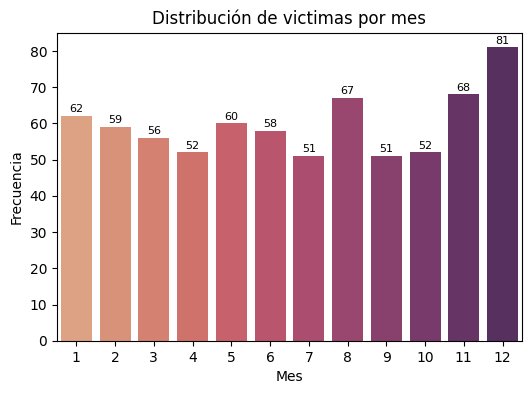

In [111]:
plt.figure(figsize=(6, 4)) 

graf = sns.countplot(df, x='Mes', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de victimas por mes')

plt.show()

El mes con mayor cantidad de siniestros y victimas es diciembre. 

En primera instancia, y como lo hicimos con los hechos,  podríamos relacionar este comportamiento a las fiestas de fin de año donde aumenta notablemente el tráfico y la consgestión, generando mas accidentes y victimas por siniestros viales.





<p>



</p>

**Día**

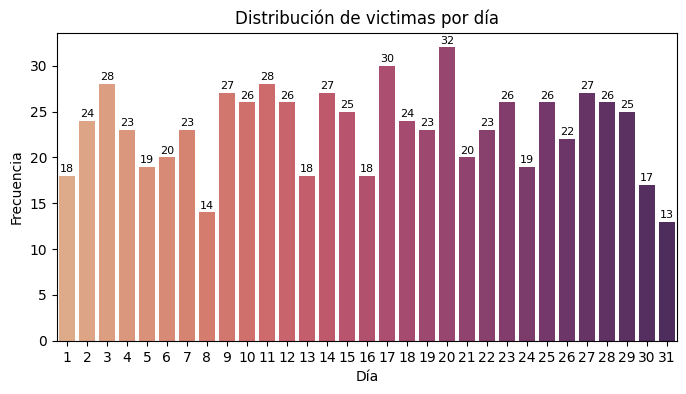

In [112]:
plt.figure(figsize=(8, 4))  # Ajustar el tamaño del gráfico si es necesario

graf = sns.countplot(df, x='Día', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.title('Distribución de victimas por día')

plt.show()

<p>



</p>

<p>



</p>

## 7. Gráficos (variables cualitativas)

### 7.1 Distribución de variables

Analizaremos ahora las variables categóricas. 

Tendremos en cuenta para el análisis las siguientes:'ROL', 'VICTIMA' y 'SEXO'

<p>



</p>

**Rol**

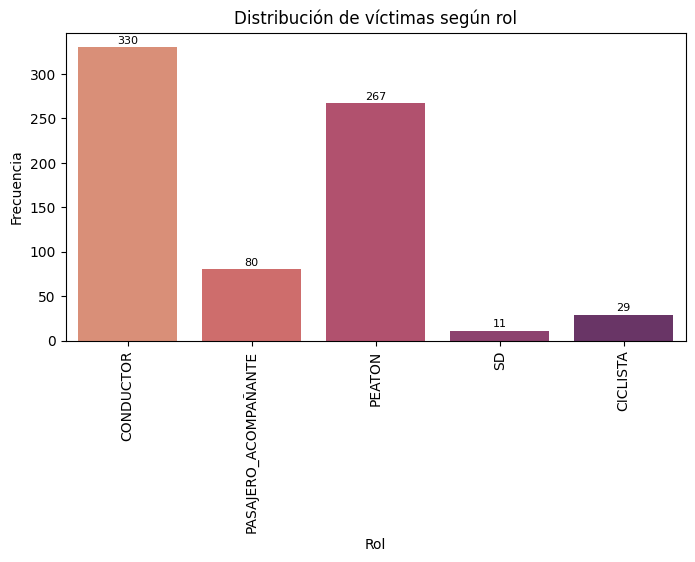

In [113]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(df, x='Rol', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90) 

plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.title('Distribución de víctimas según rol')

plt.show()


Según el rol de los involucrados en los siniestros viales, en la mayoría de los casos, las víctimas fatales de los mismos son el conductor seguido por los peatones. 


<p>



</p>

**Victima**

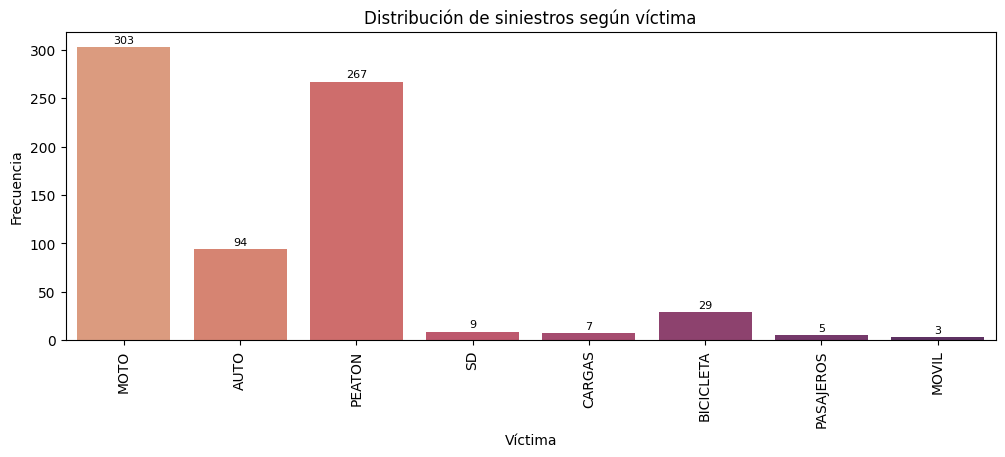

In [114]:
plt.figure(figsize=(12, 4))

graf = sns.countplot(df, x='Víctima', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90)

plt.xlabel('Víctima')
plt.ylabel('Frecuencia')
plt.title('Distribución de siniestros según víctima')

plt.show()


Siguiendo el resultado sugerido por el gráfico anterior, dentro de los conductores que resultan víctimas, se destacan los conductores de motos seguidos por los de auto. 

Ambas categorías sumarizan el 80% de los casos. 

<p>



</p>

**Sexo**

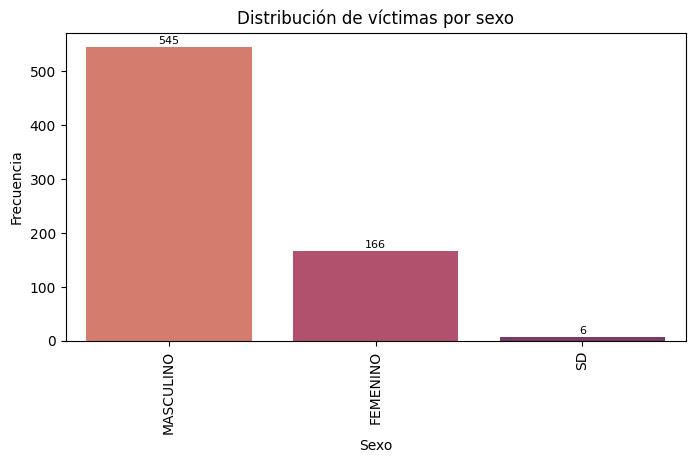

In [115]:
plt.figure(figsize=(8, 4))

graf = sns.countplot(df, x='Sexo', palette="flare")

for p in graf.patches:
    graf.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90)

plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Distribución de víctimas por sexo')

plt.show()


[]

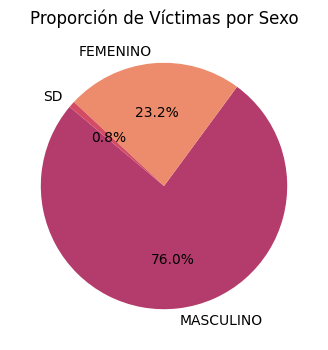

In [116]:
# Calculamos proporciones
proporcion = df['Sexo'].value_counts(normalize=True) * 100

etiquetas = proporcion.index
tamaño = proporcion.values

plt.figure(figsize=(10, 4))
plt.title('Proporción de Víctimas por Sexo')

plt.pie(tamaño, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['#b43c6c', '#ec8c6c','#d44c64'])

plt.plot()

Para concluir con este análisis, se observa que en casi el 76% de los casos las víctimas fatales son hombre contra un porcentaje bastante menor para las mujeres. 

<p>



</p>

**Rol y sexo**

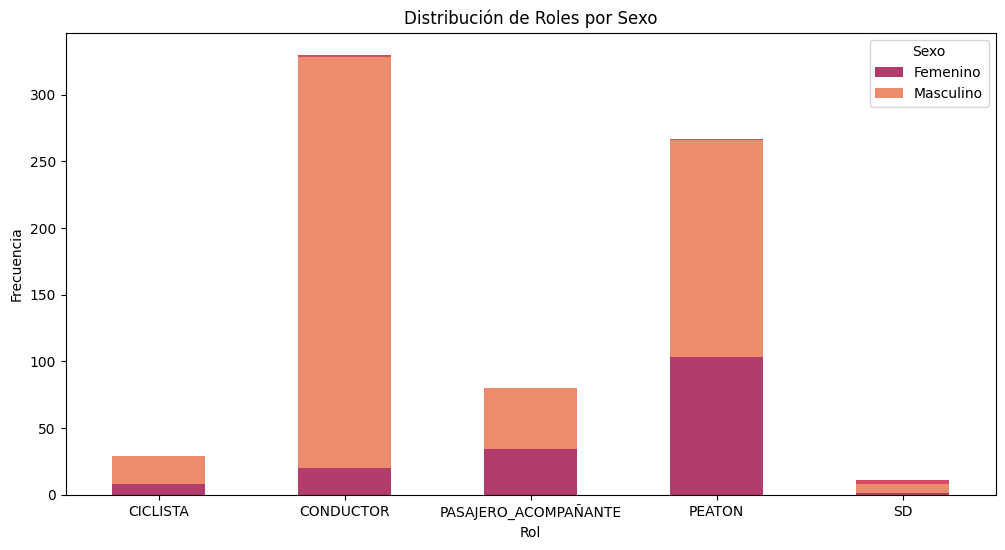

In [117]:
# Crear una tabla de contingencia
tabla = pd.crosstab(df['Rol'], df['Sexo'])

# Crear un gráfico de barras apiladas
graf = tabla.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#b43c6c', '#ec8c6c','#d44c64'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = graf.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

En este gráfico, destacamos que los accidentes donde la víctima es el conductor, en su gran mayoría el sexo del mismo es Masculino. 

### 8. Creación CSV

El último paso de nuestro análisis exploratorio es crear un archivo CSV. 

El objetivo es poder leer el archivo ya trabajado, en una plataforma de visualización. 

In [118]:
df.to_csv('Victimas.csv', index=False)

<p>



</p>